# Maratona de Filmes (SuperComp)

## Relatório Parcial

#### Insper 2023.1
Aluno: Guilherme Rosada


---

### Contextualização

Você quer passar um final de semana assistindo ao máximo de filmes possível, mas há restrições quanto aos horários disponíveis e ao número de títulos que podem ser vistos em cada categoria (comédia, drama, ação, etc).

Entrada: Um inteiro N representando o número de filmes disponíveis para assistir e N trios de inteiros (H[i], F[i], C[i]), representando a hora de início, a hora de fim e a categoria do i-ésimo filme. Além disso, um inteiro M representando o número de categorias e uma lista de M inteiros representando o número máximo de filmes que podem ser assistidos em cada categoria.

Saída: Um inteiro representando o número máximo de filmes que podem ser assistidos de acordo com as restrições de horários e número máximo por categoria.

### Overview do código

O código fonte em questão é um programa em C++ que implementa um algoritmo para agendar a exibição de filmes em um fim de semana (dois dias), com restrições de categoria e horário. O programa recebe como entrada o número de filmes, o número de categorias, o tamanho máximo de cada categoria e as informações de cada filme (início, fim e categoria). A saída do programa é uma lista ordenada de filmes agendados, bem como o número total de filmes agendados.

entrada: 
```
10 3
2 3 2 
14 16 1
0 3 3
20 23 1
7 10 3
6 10 3
16 19 2
20 23 1
10 13 3
15 18 2
8 12 3

```

O programa começa definindo uma estrutura de dados `movie` que representa cada filme e contém um identificador, tempo de início e término, e uma categoria. 

```cpp
struct movie {
    int id;
    int start;
    int end;
    int category;
};

```

Em seguida, são definidas algumas funções auxiliares. A função `read_movies_booking` lê as informações dos filmes e as armazena em um vetor de movie. A função `sort_book_by_ending_time` ordena os filmes por tempo de término, utilizando uma ordenação indireta. A função `book_a_movie` adiciona um filme à lista de filmes agendados e à lista de categorias agendadas.

A função principal começa lendo as informações de entrada, incluindo o tamanho máximo de cada categoria. Em seguida, o programa lê os filmes e os armazena em um vetor. O vetor de filmes é então ordenado por tempo de término. O programa então itera sobre os filmes, tentando agendar cada um deles. Para cada filme, a função `is_movie_available` é chamada para determinar se ele pode ser agendado. A função verifica se o filme já foi agendado, se a categoria atingiu o tamanho máximo e se o horário de início do filme atual é maior ou igual ao tempo de término do filme anterior. Se o filme puder ser agendado, ele é adicionado à lista de filmes agendados e ao tempo de término do último filme agendado. O programa itera dessa forma sobre todos os filmes nos dois dias do final de semana.

Ao final, o programa exibe a lista de filmes agendados e o número total de filmes agendados.

saida:

```
max_by_category: 2 3 2 
1 3 0 5 2 
total: 5
```

O código está bem comentado e organizado, tornando fácil a compreensão da lógica de programação utilizada. No entanto, não há um tratamento de erros para entradas inválidas e o código pode não ser otimizado para grandes conjuntos de dados.

### Heurística Gulosa vs Aleatoriedade

O algoritmo `aleatorio.cpp` diferencia-se da `heuristica.cpp` essencialmente por um fator: a adição de aleatoriedade. Essa é uma etapa no loop de ordenação que sorteia um número aleatoriamente. O número sorteado ditará se a próxima etapa seguirá a heurística gulosa ou se o próximo filme a ser escolhido será ao acaso. A chance de ser aleatório é de 25%, enquanto que a da heurística é de 75%.

# Análise de Desempenho
---

Para analisar o desempenho dos dois algoritmos, podemos utilizar uma variedade de amostras, variando o número N de filmes disponíveis e o número K de categorias.

Para isso, podemos utilizar sistematicamente o arquivo gerador de filmes `gerador`, informando a quantidade de filmes desejada e o número de categorias e utilizar nosso código `heuristica`. Porém, esse processo poderia ser bastante penoso devido à quantidade. 

Isso pode ser simplificado ao executar o código python `generate_input_for_tests.py`

```sh
python3 ./generate_input_for_tests.py

```

o código deverá gerar uma pasta *data* contendo os arquivos de inputs e outputs para teste, bem como os resultados compilados em *results.json*

### Lendo os arquivos de teste

In [59]:
import json
import pandas as pd
import matplotlib.pyplot as plt

with open("./data/results.json") as f:
    results = json.load(f)
        
df = pd.DataFrame(results)

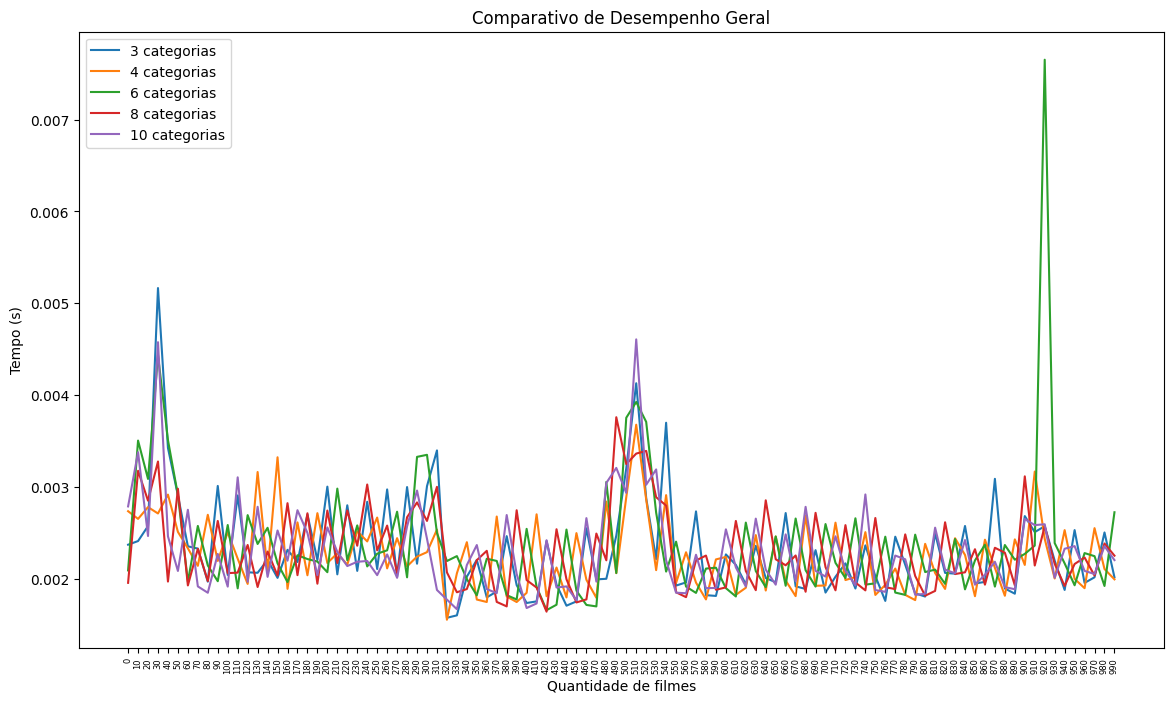

In [90]:
categories = df['k'].unique()

plt.figure(figsize=(14,8))


for cat in categories:

    results_by_category = df[df['k'] == cat]
    n_movies = results_by_category['n'].to_list()
    time = results_by_category['time'].to_list()

    plt.plot(n_movies, time, label=f'{cat} categorias')
    

plt.title("Comparativo de Desempenho Geral")
plt.ylabel("Tempo (s)")
plt.xlabel("Quantidade de filmes")
plt.xticks(fontsize=6, rotation=90)
plt.legend()

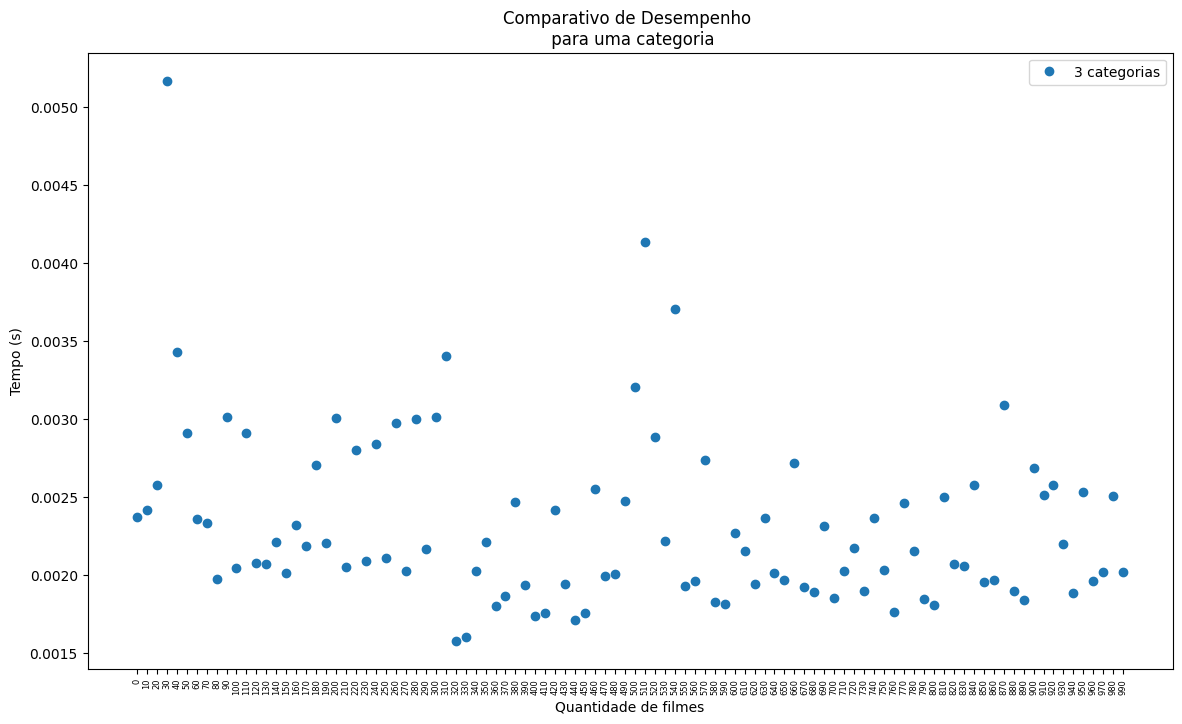

In [94]:
plt.figure(figsize=(14,8))


cat = '3'
    
results_by_category = df[df['k'] == cat]
n_movies = results_by_category['n'].to_list()
time = results_by_category['time'].to_list()

plt.plot(n_movies, time, 'o', label=f'{cat} categorias')
    
plt.title("Comparativo de Desempenho \n para uma categoria")
plt.ylabel("Tempo (s)")
plt.xlabel("Quantidade de filmes")
plt.xticks(fontsize=6, rotation=90)
plt.legend()

Pelas imagens, percebe-se que o aumento do número de filmes na casa de milhares não pareceu causar variações significativas no resultado. Nota-se apenas uma flutuação possivelmente causada por outros processos  processos rodando em paralelo na máquina ou pela prórpria variação dos inputs.

## Análise do Valgrind
---

```
--------------------------------------------------------------------------------
Profile data file 'callgrind.out.26420' (creator: callgrind-3.18.1)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 466446
Trigger: Program termination
Profiled target:  ./heuristica output.txt (PID 26420, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   heuristica.cpp
Auto-annotation:  on

--------------------------------------------------------------------------------
Ir                 
--------------------------------------------------------------------------------
2,797,192 (100.0%)  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir                file:function
--------------------------------------------------------------------------------
998,266 (35.69%)  ./elf/./elf/dl-lookup.c:_dl_lookup_symbol_x [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
577,971 (20.66%)  ./elf/./elf/dl-lookup.c:do_lookup_x [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
260,826 ( 9.32%)  ./elf/../sysdeps/x86_64/dl-machine.h:_dl_relocate_object
120,813 ( 4.32%)  ./elf/./elf/dl-lookup.c:check_match [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
108,666 ( 3.88%)  ./elf/./elf/do-rel.h:_dl_relocate_object
 75,920 ( 2.71%)  ./string/../sysdeps/x86_64/strcmp.S:strcmp [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
 73,408 ( 2.62%)  ???:std::istreambuf_iterator<char, std::char_traits<char> > std::num_get<char, std::istreambuf_iterator<char, std::char_traits<char> > >::_M_extract_int<long>(std::istreambuf_iterator<char, std::char_traits<char> >, std::istreambuf_iterator<char, std::char_traits<char> >, std::ios_base&, std::_Ios_Iostate&, long&) const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
 58,422 ( 2.09%)  ./libio/./libio/getc.c:getc [/usr/lib/x86_64-linux-gnu/libc.so.6]
 42,237 ( 1.51%)  ./libio/./libio/genops.c:_IO_sputbackc [/usr/lib/x86_64-linux-gnu/libc.so.6]
 40,014 ( 1.43%)  ./libio/./libio/ioungetc.c:ungetc [/usr/lib/x86_64-linux-gnu/libc.so.6]
 28,363 ( 1.01%)  ???:std::istream::sentry::sentry(std::istream&, bool) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
 23,540 ( 0.84%)  ./elf/./elf/dl-tunables.c:__GI___tunables_init [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
 20,094 ( 0.72%)  ./elf/../sysdeps/generic/dl-protected.h:do_lookup_x
 20,007 ( 0.72%)  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::underflow() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
 16,740 ( 0.60%)  ???:std::istream::operator>>(int&) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
 15,213 ( 0.54%)  /usr/include/c++/11/bits/stl_algobase.h:is_movie_available(std::vector<int, std::allocator<int> >&, std::vector<int, std::allocator<int> >&, std::vector<int, std::allocator<int> >&, std::vector<movie, std::allocator<movie> >&, int, int)
 12,250 ( 0.44%)  ./elf/./elf/dl-version.c:_dl_check_map_versions [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
 12,128 ( 0.43%)  ???:std::locale::_Impl::_M_install_facet(std::locale::id const*, std::locale::facet const*) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
 12,090 ( 0.43%)  ???:0x000000000012f9e0 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
 12,056 ( 0.43%)  ???:std::ostream::flush() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
 11,105 ( 0.40%)  ./elf/../sysdeps/generic/ldsodefs.h:do_lookup_x
 10,722 ( 0.38%)  ./elf/./elf/dl-runtime.c:_dl_fixup [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
 10,240 ( 0.37%)  ./wcsmbs/./wcsmbs/btowc.c:btowc [/usr/lib/x86_64-linux-gnu/libc.so.6]
 10,197 ( 0.36%)  ./elf/../sysdeps/generic/ldsodefs.h:_dl_relocate_object
  9,600 ( 0.34%)  ./libio/./libio/iofflush.c:fflush [/usr/lib/x86_64-linux-gnu/libc.so.6]
  8,747 ( 0.31%)  ???:std::ostream::sentry::sentry(std::ostream&) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
  7,798 ( 0.28%)  heuristica.cpp:is_movie_available(std::vector<int, std::allocator<int> >&, std::vector<int, std::allocator<int> >&, std::vector<int, std::allocator<int> >&, std::vector<movie, std::allocator<movie> >&, int, int) [/home/megatron/Downloads/heuristica]
  7,119 ( 0.25%)  ???:0x000000000012b140 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
  6,816 ( 0.24%)  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::uflow() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
  6,155 ( 0.22%)  ???:0x00000000048fb420 [???]
  5,786 ( 0.21%)  ./libio/./libio/fileops.c:_IO_file_sync@@GLIBC_2.2.5 [/usr/lib/x86_64-linux-gnu/libc.so.6]
  5,760 ( 0.21%)  ./libio/./libio/libioP.h:fflush
  5,580 ( 0.20%)  ???:0x00000000001032d0 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
  5,071 ( 0.18%)  /usr/include/c++/11/bits/predefined_ops.h:is_movie_available(std::vector<int, std::allocator<int> >&, std::vector<int, std::allocator<int> >&, std::vector<int, std::allocator<int> >&, std::vector<movie, std::allocator<movie> >&, int, int)
  4,674 ( 0.17%)  ./elf/../sysdeps/x86_64/dl-trampoline.h:_dl_runtime_resolve_xsave [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
  4,451 ( 0.16%)  ???:0x00000000048f8a20 [???]
  4,229 ( 0.15%)  heuristica.cpp:main [/home/megatron/Downloads/heuristica]
  4,164 ( 0.15%)  ./elf/./elf/dl-reloc.c:_dl_relocate_object [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
  3,782 ( 0.14%)  ./elf/./elf/dl-load.c:_dl_map_object_from_fd [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
  3,456 ( 0.12%)  ./wcsmbs/./wcsmbs/wctob.c:wctob [/usr/lib/x86_64-linux-gnu/libc.so.6]
  3,410 ( 0.12%)  ???:__dynamic_cast [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
  3,366 ( 0.12%)  ./elf/./elf/dl-cache.c:_dl_cache_libcmp [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
  3,223 ( 0.12%)  /usr/include/c++/11/bits/stl_iterator.h:is_movie_available(std::vector<int, std::allocator<int> >&, std::vector<int, std::allocator<int> >&, std::vector<int, std::allocator<int> >&, std::vector<movie, std::allocator<movie> >&, int, int)
  3,210 ( 0.11%)  ???:std::locale::id::_M_id() const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
  3,085 ( 0.11%)  ./elf/../sysdeps/x86/dl-cacheinfo.h:intel_check_word.constprop.0 [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
  2,848 ( 0.10%)  ./elf/./elf/dl-misc.c:_dl_name_match_p [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
  2,796 ( 0.10%)  ./malloc/./malloc/malloc.c:_int_malloc [/usr/lib/x86_64-linux-gnu/libc.so.6]
  2,733 ( 0.10%)  ???:std::ctype<wchar_t>::_M_initialize_ctype() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
  2,604 ( 0.09%)  ???:std::ostreambuf_iterator<char, std::char_traits<char> > std::num_put<char, std::ostreambuf_iterator<char, std::char_traits<char> > >::_M_insert_int<long>(std::ostreambuf_iterator<char, std::char_traits<char> >, std::ios_base&, char, long) const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
  2,423 ( 0.09%)  ???:std::basic_filebuf<char, std::char_traits<char> >::xsputn(char const*, long) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
  2,259 ( 0.08%)  ???:std::basic_streambuf<char, std::char_traits<char> >::xsputn(char const*, long) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
  2,243 ( 0.08%)  ./elf/./elf/dl-load.c:_dl_map_object [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
  2,226 ( 0.08%)  ./elf/./elf/dl-deps.c:_dl_map_object_deps [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
  2,222 ( 0.08%)  ./elf/../bits/stdlib-bsearch.h:intel_check_word.constprop.0
  2,136 ( 0.08%)  heuristica.cpp:read_movies_booking(int, std::vector<movie, std::allocator<movie> >&) [/home/megatron/Downloads/heuristica]
  1,957 ( 0.07%)  ./elf/./elf/dl-tunables.h:__GI___tunables_init
  1,850 ( 0.07%)  ???:__cxxabiv1::__si_class_type_info::__do_dyncast(long, __cxxabiv1::__class_type_info::__sub_kind, __cxxabiv1::__class_type_info const*, void const*, __cxxabiv1::__class_type_info const*, void const*, __cxxabiv1::__class_type_info::__dyncast_result&) const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
  1,680 ( 0.06%)  ???:std::basic_ostream<char, std::char_traits<char> >& std::__ostream_insert<char, std::char_traits<char> >(std::basic_ostream<char, std::char_traits<char> >&, char const*, long) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
  1,622 ( 0.06%)  ./malloc/./malloc/malloc.c:_int_free [/usr/lib/x86_64-linux-gnu/libc.so.6]
  1,614 ( 0.06%)  ???:std::ostream& std::ostream::_M_insert<long>(long) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
  1,577 ( 0.06%)  /usr/include/c++/11/bits/stl_algo.h:main
  1,513 ( 0.05%)  ./elf/./elf/dl-load.c:open_verify.constprop.0 [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
  1,492 ( 0.05%)  ./elf/./elf/get-dynamic-info.h:_dl_map_object_from_fd
  1,423 ( 0.05%)  ./string/../sysdeps/x86_64/multiarch/memmove-vec-unaligned-erms.S:__memcpy_avx_unaligned_erms [/usr/lib/x86_64-linux-gnu/libc.so.6]
  1,308 ( 0.05%)  ./elf/./elf/rtld.c:dl_main [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
  1,266 ( 0.05%)  ./elf/./elf/dl-load.c:open_path [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
  1,256 ( 0.04%)  ./elf/./elf/dl-cache.c:_dl_load_cache_lookup [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
  1,129 ( 0.04%)  ./elf/./elf/dl-object.c:_dl_new_object [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
  1,115 ( 0.04%)  ./elf/./elf/dl-minimal-malloc.c:__minimal_malloc [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
  1,113 ( 0.04%)  ./malloc/./malloc/malloc.c:malloc [/usr/lib/x86_64-linux-gnu/libc.so.6]
  1,095 ( 0.04%)  ./string/../sysdeps/x86_64/multiarch/memcmp-avx2-movbe.S:__memcmp_avx2_movbe [/usr/lib/x86_64-linux-gnu/libc.so.6]
  1,068 ( 0.04%)  /usr/include/c++/11/bits/stl_algo.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}> >(__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, __gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}>)'2
  1,036 ( 0.04%)  ./wctype/./wctype/wctype_l.c:wctype_l [/usr/lib/x86_64-linux-gnu/libc.so.6]
    990 ( 0.04%)  ???:0x000000000012e7e0 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
    966 ( 0.03%)  ./string/../sysdeps/x86_64/multiarch/strlen-avx2.S:__strlen_avx2 [/usr/lib/x86_64-linux-gnu/libc.so.6]
    945 ( 0.03%)  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::sync() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
    940 ( 0.03%)  /usr/include/c++/11/bits/stl_vector.h:main
    931 ( 0.03%)  ???:0x00000000048f86d0 [???]
    896 ( 0.03%)  ./wcsmbs/./wcsmbsload.h:btowc
    883 ( 0.03%)  ./elf/../sysdeps/x86_64/dl-machine.h:_dl_start
    876 ( 0.03%)  ???:__cxxabiv1::__vmi_class_type_info::__do_dyncast(long, __cxxabiv1::__class_type_info::__sub_kind, __cxxabiv1::__class_type_info const*, void const*, __cxxabiv1::__class_type_info const*, void const*, __cxxabiv1::__class_type_info::__dyncast_result&) const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
    816 ( 0.03%)  ./string/../sysdeps/x86_64/multiarch/memset-vec-unaligned-erms.S:memset [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    815 ( 0.03%)  ./elf/./elf/do-rel.h:_dl_start
    797 ( 0.03%)  ./string/../sysdeps/x86_64/multiarch/strlen-vec.S:strlen [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    776 ( 0.03%)  ./malloc/./malloc/malloc.c:ptmalloc_init.part.0
    774 ( 0.03%)  ./elf/../sysdeps/nptl/dl-tls_init_tp.c:rtld_mutex_dummy [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    768 ( 0.03%)  ./elf/./elf/dl-hwcaps.c:_dl_important_hwcaps [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    768 ( 0.03%)  ./elf/./elf/dl-profstub.c:_dl_mcount_wrapper_check [/usr/lib/x86_64-linux-gnu/libc.so.6]
    768 ( 0.03%)  ./iconv/./iconv/gconv_simple.c:__gconv_btwoc_ascii [/usr/lib/x86_64-linux-gnu/libc.so.6]
    765 ( 0.03%)  ???:0x00000000048fb220 [???]
    744 ( 0.03%)  ./string/../sysdeps/x86_64/multiarch/../strchr.S:index [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    740 ( 0.03%)  ./elf/./elf/dl-tunables.c:__tunable_get_val [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    732 ( 0.03%)  ???:std::ctype<char>::_M_widen_init() const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
    715 ( 0.03%)  ./elf/./dl-map-segments.h:_dl_map_object_from_fd
    705 ( 0.03%)  ./stdlib/./stdlib/cxa_finalize.c:__cxa_finalize [/usr/lib/x86_64-linux-gnu/libc.so.6]
    668 ( 0.02%)  /usr/include/c++/11/bits/stl_algo.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}> >(__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, __gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}>)
    666 ( 0.02%)  ???:std::locale::_Impl::_Impl(unsigned long) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
    645 ( 0.02%)  ???:0x00000000048fb360 [???]
    639 ( 0.02%)  ???:0x00000000048f9790 [???]
    629 ( 0.02%)  ./string/../sysdeps/x86_64/multiarch/memmove-vec-unaligned-erms.S:mempcpy [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    625 ( 0.02%)  ???:0x00000000048f9160 [???]
    625 ( 0.02%)  ???:0x00000000048fa9c0 [???]
    620 ( 0.02%)  ???:0x000000000010a220 [???]
    620 ( 0.02%)  ???:std::num_get<char, std::istreambuf_iterator<char, std::char_traits<char> > >::do_get(std::istreambuf_iterator<char, std::char_traits<char> >, std::istreambuf_iterator<char, std::char_traits<char> >, std::ios_base&, std::_Ios_Iostate&, long&) const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
    600 ( 0.02%)  /usr/include/c++/11/bits/stl_vector.h:is_movie_available(std::vector<int, std::allocator<int> >&, std::vector<int, std::allocator<int> >&, std::vector<int, std::allocator<int> >&, std::vector<movie, std::allocator<movie> >&, int, int)
    596 ( 0.02%)  ./elf/../sysdeps/x86/dl-cacheinfo.h:handle_intel.constprop.0 [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    594 ( 0.02%)  ./string/../sysdeps/x86_64/multiarch/memmove-vec-unaligned-erms.S:memcpy [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    588 ( 0.02%)  /usr/include/c++/11/bits/predefined_ops.h:main
    530 ( 0.02%)  ./elf/./elf/dl-sort-maps.c:dfs_traversal.part.0 [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    528 ( 0.02%)  ./malloc/./malloc/malloc.c:free [/usr/lib/x86_64-linux-gnu/libc.so.6]
    522 ( 0.02%)  ???:std::ios_base::ios_base() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
    517 ( 0.02%)  ???:0x00000000048faa90 [???]
    516 ( 0.02%)  /usr/include/c++/11/bits/stl_vector.h:read_movies_booking(int, std::vector<movie, std::allocator<movie> >&)
    502 ( 0.02%)  ./elf/../sysdeps/x86/dl-prop.h:_dl_map_object_from_fd
    489 ( 0.02%)  heuristica.cpp:void std::__introsort_loop<__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}> >(__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, __gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}>)'2
    477 ( 0.02%)  ./elf/../elf/dl-sysdep.c:_dl_sysdep_start [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    442 ( 0.02%)  ???:std::locale::locale() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
    437 ( 0.02%)  ./elf/./elf/dl-hwcaps_split.c:_dl_hwcaps_split_masked [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    436 ( 0.02%)  ./elf/./dl-find_object.h:_dl_find_object_from_map [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    429 ( 0.02%)  ./stdlib/./stdlib/cxa_atexit.c:__cxa_atexit [/usr/lib/x86_64-linux-gnu/libc.so.6]
    422 ( 0.02%)  /usr/include/c++/11/bits/predefined_ops.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}> >(__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, __gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}>)'2
    420 ( 0.02%)  ./elf/./elf/dl-error-skeleton.c:_dl_catch_exception [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    414 ( 0.01%)  ./elf/./elf/dl-fini.c:_dl_fini [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    414 ( 0.01%)  ???:std::__cxx11::numpunct<char>::_M_initialize_numpunct(__locale_struct*) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
    414 ( 0.01%)  ???:std::numpunct<char>::_M_initialize_numpunct(__locale_struct*) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
    413 ( 0.01%)  ./elf/./elf/dl-init.c:call_init.part.0 [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    400 ( 0.01%)  ./io/../sysdeps/unix/sysv/linux/open64_nocancel.c:__open_nocancel [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    392 ( 0.01%)  ./stdlib/./stdlib/cxa_atexit.c:__new_exitfn [/usr/lib/x86_64-linux-gnu/libc.so.6]
    356 ( 0.01%)  /usr/include/c++/11/bits/stl_iterator.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}> >(__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, __gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}>)'2 [/home/megatron/Downloads/heuristica]
    350 ( 0.01%)  ./elf/../elf/dl-tls.c:_dl_allocate_tls_storage [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    350 ( 0.01%)  ???:std::__cxx11::numpunct<wchar_t>::_M_initialize_numpunct(__locale_struct*) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
    350 ( 0.01%)  ???:std::numpunct<wchar_t>::_M_initialize_numpunct(__locale_struct*) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.30]
    346 ( 0.01%)  /usr/include/c++/11/bits/stl_iterator.h:main
    344 ( 0.01%)  ./elf/./elf/dl-sort-maps.c:_dl_sort_maps [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    342 ( 0.01%)  ./elf/./get-dynamic-info.h:dl_main
    337 ( 0.01%)  ./elf/./elf/dl-environ.c:_dl_next_ld_env_entry [/usr/lib/x86_64-linux-gnu/ld-linux-x86-64.so.2]
    332 ( 0.01%)  /usr/include/c++/11/bits/vector.tcc:void std::vector<int, std::allocator<int> >::_M_realloc_insert<int const&>(__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, int const&) [/home/megatron/Downloads/heuristica]
    332 ( 0.01%)  heuristica.cpp:void std::__introsort_loop<__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}> >(__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, __gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}>)
    315 ( 0.01%)  ???:0x0000000000003740 [/usr/lib/x86_64-linux-gnu/libgcc_s.so.1]

--------------------------------------------------------------------------------
-- Auto-annotated source: /usr/include/c++/11/bits/stl_vector.h
--------------------------------------------------------------------------------
Ir           

-- line 90 ----------------------------------------
  .           
  .                 struct _Vector_impl_data
  .                 {
  .           	pointer _M_start;
  .           	pointer _M_finish;
  .           	pointer _M_end_of_storage;
  .           
  .           	_Vector_impl_data() _GLIBCXX_NOEXCEPT
 14 ( 0.00%)  	: _M_start(), _M_finish(), _M_end_of_storage()
  .           	{ }
  .           
  .           #if __cplusplus >= 201103L
  .           	_Vector_impl_data(_Vector_impl_data&& __x) noexcept
  .           	: _M_start(__x._M_start), _M_finish(__x._M_finish),
  .           	  _M_end_of_storage(__x._M_end_of_storage)
  .           	{ __x._M_start = __x._M_finish = __x._M_end_of_storage = pointer(); }
  .           #endif
-- line 106 ----------------------------------------
-- line 328 ----------------------------------------
  .                 _Vector_base(const allocator_type& __a, _Vector_base&& __x)
  .                 : _M_impl(_Tp_alloc_type(__a), std::move(__x._M_impl))
  .                 { }
  .           #endif
  .           
  .                 ~_Vector_base() _GLIBCXX_NOEXCEPT
  .                 {
  .           	_M_deallocate(_M_impl._M_start,
 14 ( 0.00%)  		      _M_impl._M_end_of_storage - _M_impl._M_start);
  .                 }
  .           
  .               public:
  .                 _Vector_impl _M_impl;
  .           
  .                 pointer
  .                 _M_allocate(size_t __n)
  .                 {
  .           	typedef __gnu_cxx::__alloc_traits<_Tp_alloc_type> _Tr;
 44 ( 0.00%)  	return __n != 0 ? _Tr::allocate(_M_impl, __n) : pointer();
  .                 }
  .           
  .                 void
  .                 _M_deallocate(pointer __p, size_t __n)
  .                 {
  .           	typedef __gnu_cxx::__alloc_traits<_Tp_alloc_type> _Tr;
 22 ( 0.00%)  	if (__p)
  .           	  _Tr::deallocate(_M_impl, __p, __n);
  .                 }
  .           
  .               protected:
  .                 void
  .                 _M_create_storage(size_t __n)
  .                 {
  .           	this->_M_impl._M_start = this->_M_allocate(__n);
-- line 361 ----------------------------------------
-- line 672 ----------------------------------------
  .                 /**
  .                  *  The dtor only erases the elements, and note that if the
  .                  *  elements themselves are pointers, the pointed-to memory is
  .                  *  not touched in any way.  Managing the pointer is the user's
  .                  *  responsibility.
  .                  */
  .                 ~vector() _GLIBCXX_NOEXCEPT
  .                 {
  4 ( 0.00%)  	std::_Destroy(this->_M_impl._M_start, this->_M_impl._M_finish,
  .           		      _M_get_Tp_allocator());
  .           	_GLIBCXX_ASAN_ANNOTATE_BEFORE_DEALLOC;
  .                 }
  .           
  .                 /**
  .                  *  @brief  %Vector assignment operator.
  .                  *  @param  __x  A %vector of identical element and allocator types.
  .                  *
-- line 688 ----------------------------------------
-- line 911 ----------------------------------------
  .                 crend() const noexcept
  .                 { return const_reverse_iterator(begin()); }
  .           #endif
  .           
  .                 // [23.2.4.2] capacity
  .                 /**  Returns the number of elements in the %vector.  */
  .                 size_type
  .                 size() const _GLIBCXX_NOEXCEPT
 67 ( 0.00%)        { return size_type(this->_M_impl._M_finish - this->_M_impl._M_start); }
  .           
  .                 /**  Returns the size() of the largest possible %vector.  */
  .                 size_type
  .                 max_size() const _GLIBCXX_NOEXCEPT
  .                 { return _S_max_size(_M_get_Tp_allocator()); }
  .           
  .           #if __cplusplus >= 201103L
  .                 /**
-- line 927 ----------------------------------------
-- line 992 ----------------------------------------
  .           
  .                 /**
  .                  *  Returns the total number of elements that the %vector can
  .                  *  hold before needing to allocate more memory.
  .                  */
  .                 size_type
  .                 capacity() const _GLIBCXX_NOEXCEPT
  .                 { return size_type(this->_M_impl._M_end_of_storage
 10 ( 0.00%)  			 - this->_M_impl._M_start); }
  .           
  .                 /**
  .                  *  Returns true if the %vector is empty.  (Thus begin() would
  .                  *  equal end().)
  .                  */
  .                 _GLIBCXX_NODISCARD bool
  .                 empty() const _GLIBCXX_NOEXCEPT
  .                 { return begin() == end(); }
-- line 1008 ----------------------------------------
-- line 1038 ----------------------------------------
  .                  *  Note that data access with this operator is unchecked and
  .                  *  out_of_range lookups are not defined. (For checked lookups
  .                  *  see at().)
  .                  */
  .                 reference
  .                 operator[](size_type __n) _GLIBCXX_NOEXCEPT
  .                 {
  .           	__glibcxx_requires_subscript(__n);
896 ( 0.03%)  	return *(this->_M_impl._M_start + __n);
  .                 }
  .           
  .                 /**
  .                  *  @brief  Subscript access to the data contained in the %vector.
  .                  *  @param __n The index of the element for which data should be
  .                  *  accessed.
  .                  *  @return  Read-only (constant) reference to data.
  .                  *
-- line 1054 ----------------------------------------
-- line 1181 ----------------------------------------
  .                  *  element at the end of the %vector and assigns the given data
  .                  *  to it.  Due to the nature of a %vector this operation can be
  .                  *  done in constant time if the %vector has preallocated space
  .                  *  available.
  .                  */
  .                 void
  .                 push_back(const value_type& __x)
  .                 {
644 ( 0.02%)  	if (this->_M_impl._M_finish != this->_M_impl._M_end_of_storage)
  .           	  {
  .           	    _GLIBCXX_ASAN_ANNOTATE_GROW(1);
  .           	    _Alloc_traits::construct(this->_M_impl, this->_M_impl._M_finish,
  .           				     __x);
456 ( 0.02%)  	    ++this->_M_impl._M_finish;
  .           	    _GLIBCXX_ASAN_ANNOTATE_GREW(1);
  .           	  }
  .           	else
 66 ( 0.00%)  	  _M_realloc_insert(end(), __x);
4,635 ( 0.17%)  => /usr/include/c++/11/bits/vector.tcc:void std::vector<movie, std::allocator<movie> >::_M_realloc_insert<movie const&>(__gnu_cxx::__normal_iterator<movie*, std::vector<movie, std::allocator<movie> > >, movie const&) (8x)
  .                 }
  .           
  .           #if __cplusplus >= 201103L
  .                 void
  .                 push_back(value_type&& __x)
  .                 { emplace_back(std::move(__x)); }
  .           
  .                 template<typename... _Args>
-- line 1206 ----------------------------------------
-- line 1750 ----------------------------------------
  .                 _M_emplace_aux(const_iterator __position, value_type&& __v)
  .                 { return _M_insert_rval(__position, std::move(__v)); }
  .           #endif
  .           
  .                 // Called by _M_fill_insert, _M_insert_aux etc.
  .                 size_type
  .                 _M_check_len(size_type __n, const char* __s) const
  .                 {
200 ( 0.01%)  	if (max_size() - size() < __n)
  .           	  __throw_length_error(__N(__s));
  .           
  .           	const size_type __len = size() + (std::max)(size(), __n);
 40 ( 0.00%)  	return (__len < size() || __len > max_size()) ? max_size() : __len;
  .                 }
  .           
  .                 // Called by constructors to check initial size.
  .                 static size_type
  .                 _S_check_init_len(size_type __n, const allocator_type& __a)
  .                 {
  .           	if (__n > _S_max_size(_Tp_alloc_type(__a)))
  .           	  __throw_length_error(
-- line 1770 ----------------------------------------

--------------------------------------------------------------------------------
-- Auto-annotated source: /usr/include/c++/11/bits/stl_algo.h
--------------------------------------------------------------------------------
Ir           

-- line 74 ----------------------------------------
  .           
  .             /// Swaps the median value of *__a, *__b and *__c under __comp to *__result
  .             template<typename _Iterator, typename _Compare>
  .               _GLIBCXX20_CONSTEXPR
  .               void
  .               __move_median_to_first(_Iterator __result,_Iterator __a, _Iterator __b,
  .           			   _Iterator __c, _Compare __comp)
  .               {
 18 ( 0.00%)        if (__comp(__a, __b))
  .           	{
  6 ( 0.00%)  	  if (__comp(__b, __c))
  .           	    std::iter_swap(__result, __b);
  6 ( 0.00%)  	  else if (__comp(__a, __c))
  .           	    std::iter_swap(__result, __c);
  .           	  else
  .           	    std::iter_swap(__result, __a);
  .           	}
 12 ( 0.00%)        else if (__comp(__a, __c))
  .           	std::iter_swap(__result, __a);
  6 ( 0.00%)        else if (__comp(__b, __c))
  .           	std::iter_swap(__result, __c);
  .                 else
  .           	std::iter_swap(__result, __b);
  .               }
  .           
  .             /// Provided for stable_partition to use.
  .             template<typename _InputIterator, typename _Predicate>
  .               _GLIBCXX20_CONSTEXPR
-- line 101 ----------------------------------------
-- line 1791 ----------------------------------------
  .           				      __result_first, __result_last,
  .           				__gnu_cxx::__ops::__iter_comp_iter(__comp));
  .               }
  .           
  .             /// This is a helper function for the sort routine.
  .             template<typename _RandomAccessIterator, typename _Compare>
  .               _GLIBCXX20_CONSTEXPR
  .               void
 84 ( 0.00%)      __unguarded_linear_insert(_RandomAccessIterator __last,
  .           			      _Compare __comp)
  .               {
  .                 typename iterator_traits<_RandomAccessIterator>::value_type
168 ( 0.01%)  	__val = _GLIBCXX_MOVE(*__last);
  .                 _RandomAccessIterator __next = __last;
  .                 --__next;
922 ( 0.03%)        while (__comp(__val, __next))
  .           	{
192 ( 0.01%)  	  *__last = _GLIBCXX_MOVE(*__next);
  .           	  __last = __next;
  .           	  --__next;
  .           	}
101 ( 0.00%)        *__last = _GLIBCXX_MOVE(__val);
  .               }
  .           
  .             /// This is a helper function for the sort routine.
  .             template<typename _RandomAccessIterator, typename _Compare>
  .               _GLIBCXX20_CONSTEXPR
  .               void
  9 ( 0.00%)      __insertion_sort(_RandomAccessIterator __first,
  .           		     _RandomAccessIterator __last, _Compare __comp)
  .               {
  2 ( 0.00%)        if (__first == __last) return;
  .           
 33 ( 0.00%)        for (_RandomAccessIterator __i = __first + 1; __i != __last; ++__i)
  .           	{
 30 ( 0.00%)  	  if (__comp(__i, __first))
  .           	    {
  .           	      typename iterator_traits<_RandomAccessIterator>::value_type
  .           		__val = _GLIBCXX_MOVE(*__i);
  .           	      _GLIBCXX_MOVE_BACKWARD3(__first, __i, __i + 1);
  1 ( 0.00%)  	      *__first = _GLIBCXX_MOVE(__val);
  .           	    }
  .           	  else
  .           	    std::__unguarded_linear_insert(__i,
  .           				__gnu_cxx::__ops::__val_comp_iter(__comp));
  .           	}
  8 ( 0.00%)      }
  .           
  .             /// This is a helper function for the sort routine.
  .             template<typename _RandomAccessIterator, typename _Compare>
  .               _GLIBCXX20_CONSTEXPR
  .               inline void
  .               __unguarded_insertion_sort(_RandomAccessIterator __first,
  .           			       _RandomAccessIterator __last, _Compare __comp)
  .               {
254 ( 0.01%)        for (_RandomAccessIterator __i = __first; __i != __last; ++__i)
  .           	std::__unguarded_linear_insert(__i,
  .           				__gnu_cxx::__ops::__val_comp_iter(__comp));
  .               }
  .           
  .             /**
  .              *  @doctodo
  .              *  This controls some aspect of the sort routines.
  .             */
-- line 1854 ----------------------------------------
-- line 1856 ----------------------------------------
  .           
  .             /// This is a helper function for the sort routine.
  .             template<typename _RandomAccessIterator, typename _Compare>
  .               _GLIBCXX20_CONSTEXPR
  .               void
  .               __final_insertion_sort(_RandomAccessIterator __first,
  .           			   _RandomAccessIterator __last, _Compare __comp)
  .               {
  2 ( 0.00%)        if (__last - __first > int(_S_threshold))
  .           	{
  3 ( 0.00%)  	  std::__insertion_sort(__first, __first + int(_S_threshold), __comp);
576 ( 0.02%)  => /usr/include/c++/11/bits/stl_algo.h:void std::__insertion_sort<__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}> >(__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, __gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}>) (1x)
  .           	  std::__unguarded_insertion_sort(__first + int(_S_threshold), __last,
  .           					  __comp);
  .           	}
  .                 else
  .           	std::__insertion_sort(__first, __last, __comp);
  .               }
  .           
  .             /// This is a helper function...
  .             template<typename _RandomAccessIterator, typename _Compare>
  .               _GLIBCXX20_CONSTEXPR
  .               _RandomAccessIterator
 27 ( 0.00%)      __unguarded_partition(_RandomAccessIterator __first,
  .           			  _RandomAccessIterator __last,
  .           			  _RandomAccessIterator __pivot, _Compare __comp)
  .               {
  .                 while (true)
  .           	{
563 ( 0.02%)  	  while (__comp(__first, __pivot))
  .           	    ++__first;
  .           	  --__last;
691 ( 0.02%)  	  while (__comp(__pivot, __last))
  .           	    --__last;
178 ( 0.01%)  	  if (!(__first < __last))
  .           	    return __first;
  .           	  std::iter_swap(__first, __last);
  .           	  ++__first;
  .           	}
  .               }
  .           
  .             /// This is a helper function...
  .             template<typename _RandomAccessIterator, typename _Compare>
  .               _GLIBCXX20_CONSTEXPR
  .               inline _RandomAccessIterator
  .               __unguarded_partition_pivot(_RandomAccessIterator __first,
  .           				_RandomAccessIterator __last, _Compare __comp)
  .               {
 27 ( 0.00%)        _RandomAccessIterator __mid = __first + (__last - __first) / 2;
  .                 std::__move_median_to_first(__first, __first + 1, __mid, __last - 1,
  .           				  __comp);
  .                 return std::__unguarded_partition(__first + 1, __last, __first, __comp);
  .               }
  .           
  .             template<typename _RandomAccessIterator, typename _Compare>
  .               _GLIBCXX20_CONSTEXPR
  .               inline void
-- line 1911 ----------------------------------------
-- line 1917 ----------------------------------------
  .                 std::__heap_select(__first, __middle, __last, __comp);
  .                 std::__sort_heap(__first, __middle, __comp);
  .               }
  .           
  .             /// This is a helper function for the sort routine.
  .             template<typename _RandomAccessIterator, typename _Size, typename _Compare>
  .               _GLIBCXX20_CONSTEXPR
  .               void
 44 ( 0.00%)      __introsort_loop(_RandomAccessIterator __first,
  .           		     _RandomAccessIterator __last,
  .           		     _Size __depth_limit, _Compare __comp)
  .               {
 38 ( 0.00%)        while (__last - __first > int(_S_threshold))
  .           	{
 28 ( 0.00%)  	  if (__depth_limit == 0)
  .           	    {
  .           	      std::__partial_sort(__first, __last, __last, __comp);
  .           	      return;
  .           	    }
  9 ( 0.00%)  	  --__depth_limit;
  .           	  _RandomAccessIterator __cut =
  .           	    std::__unguarded_partition_pivot(__first, __last, __comp);
 45 ( 0.00%)  	  std::__introsort_loop(__cut, __last, __depth_limit, __comp);
2,470 ( 0.09%)  => /usr/include/c++/11/bits/stl_iterator.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}> >(__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, __gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}>)'2 (3x)
  .           	  __last = __cut;
  .           	}
 38 ( 0.00%)      }
  .           
  .             // sort
  .           
  .             template<typename _RandomAccessIterator, typename _Compare>
  .               _GLIBCXX20_CONSTEXPR
  .               inline void
  .               __sort(_RandomAccessIterator __first, _RandomAccessIterator __last,
  .           	   _Compare __comp)
  .               {
  2 ( 0.00%)        if (__first != __last)
  .           	{
  4 ( 0.00%)  	  std::__introsort_loop(__first, __last,
4,053 ( 0.14%)  => /usr/include/c++/11/bits/stl_iterator.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}> >(__gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, __gnu_cxx::__normal_iterator<int*, std::vector<int, std::allocator<int> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<sort_book_by_ending_time(std::vector<movie, std::allocator<movie> >&, std::vector<int, std::allocator<int> >&)::{lambda(int, int)#1}>) (1x)
  .           				std::__lg(__last - __first) * 2,
  .           				__comp);
  .           	  std::__final_insertion_sort(__first, __last, __comp);
  .           	}
  .               }
  .           
  .             template<typename _RandomAccessIterator, typename _Size, typename _Compare>
  .               _GLIBCXX20_CONSTEXPR
-- line 1962 ----------------------------------------

--------------------------------------------------------------------------------
-- Auto-annotated source: /usr/include/c++/11/bits/stl_iterator.h
--------------------------------------------------------------------------------
Ir             

-- line 1003 ----------------------------------------
    .                 using iterator_concept = std::__detail::__iter_concept<_Iterator>;
    .           #endif
    .           
    .                 _GLIBCXX_CONSTEXPR __normal_iterator() _GLIBCXX_NOEXCEPT
    .                 : _M_current(_Iterator()) { }
    .           
    .                 explicit _GLIBCXX20_CONSTEXPR
    .                 __normal_iterator(const _Iterator& __i) _GLIBCXX_NOEXCEPT
1,525 ( 0.05%)        : _M_current(__i) { }
    .           
    .                 // Allow iterator to const_iterator conversion
    .                 template<typename _Iter>
    .                   _GLIBCXX20_CONSTEXPR
    .                   __normal_iterator(const __normal_iterator<_Iter,
    .           			  typename __enable_if<
    .                 	       (std::__are_same<_Iter, typename _Container::pointer>::__value),
    .           		      _Container>::__type>& __i) _GLIBCXX_NOEXCEPT
-- line 1019 ----------------------------------------
-- line 1029 ----------------------------------------
    .                 pointer
    .                 operator->() const _GLIBCXX_NOEXCEPT
    .                 { return _M_current; }
    .           
    .                 _GLIBCXX20_CONSTEXPR
    .                 __normal_iterator&
    .                 operator++() _GLIBCXX_NOEXCEPT
    .                 {
  591 ( 0.02%)  	++_M_current;
   80 ( 0.00%)  	return *this;
    .                 }
    .           
    .                 _GLIBCXX20_CONSTEXPR
    .                 __normal_iterator
    .                 operator++(int) _GLIBCXX_NOEXCEPT
    .                 { return __normal_iterator(_M_current++); }
    .           
    .                 // Bidirectional iterator requirements
    .                 _GLIBCXX20_CONSTEXPR
    .                 __normal_iterator&
  192 ( 0.01%)        operator--() _GLIBCXX_NOEXCEPT
    .                 {
  456 ( 0.02%)  	--_M_current;
    .           	return *this;
    .                 }
    .           
    .                 _GLIBCXX20_CONSTEXPR
    .                 __normal_iterator
    .                 operator--(int) _GLIBCXX_NOEXCEPT
    .                 { return __normal_iterator(_M_current--); }
    .           
-- line 1059 ----------------------------------------
-- line 1066 ----------------------------------------
    .                 _GLIBCXX20_CONSTEXPR
    .                 __normal_iterator&
    .                 operator+=(difference_type __n) _GLIBCXX_NOEXCEPT
    .                 { _M_current += __n; return *this; }
    .           
    .                 _GLIBCXX20_CONSTEXPR
    .                 __normal_iterator
    .                 operator+(difference_type __n) const _GLIBCXX_NOEXCEPT
   16 ( 0.00%)        { return __normal_iterator(_M_current + __n); }
    .           
    .                 _GLIBCXX20_CONSTEXPR
    .                 __normal_iterator&
    .                 operator-=(difference_type __n) _GLIBCXX_NOEXCEPT
    .                 { _M_current -= __n; return *this; }
    .           
    .                 _GLIBCXX20_CONSTEXPR
    .                 __normal_iterator
-- line 1082 ----------------------------------------
-- line 1229 ----------------------------------------
    .               { return __lhs.base() - __rhs.base(); }
    .           
    .             template<typename _Iterator, typename _Container>
    .               _GLIBCXX20_CONSTEXPR
    .               inline typename __normal_iterator<_Iterator, _Container>::difference_type
    .               operator-(const __normal_iterator<_Iterator, _Container>& __lhs,
    .           	      const __normal_iterator<_Iterator, _Container>& __rhs)
    .               _GLIBCXX_NOEXCEPT
1,413 ( 0.05%)      { return __lhs.base() - __rhs.base(); }
    .           
    .             template<typename _Iterator, typename _Container>
    .               _GLIBCXX20_CONSTEXPR
    .               inline __normal_iterator<_Iterator, _Container>
    .               operator+(typename __normal_iterator<_Iterator, _Container>::difference_type
    .           	      __n, const __normal_iterator<_Iterator, _Container>& __i)
    .               _GLIBCXX_NOEXCEPT
    .               { return __normal_iterator<_Iterator, _Container>(__i.base() + __n); }
-- line 1245 ----------------------------------------

--------------------------------------------------------------------------------
-- User-annotated source: heuristica.cpp
--------------------------------------------------------------------------------
Ir             

-- line 10 ----------------------------------------
    .           
    .           struct movie {
    .               int id;
    .               int start;
    .               int end;
    .               int category;
    .           };
    .           
   12 ( 0.00%)  void read_movies_booking(int size, vector<movie> &book) {
  395 ( 0.01%)      for (int i = 0; i < size; i++) {
    .                   movie m;
  100 ( 0.00%)          m.id = i;
  300 ( 0.01%)          cin >> m.start;
131,136 ( 4.69%)  => ???:0x000000000010a220 (100x)
  300 ( 0.01%)          cin >> m.end;
121,020 ( 4.33%)  => ???:0x000000000010a220 (100x)
    .           
  300 ( 0.01%)          if (m.end < m.start) {
   18 ( 0.00%)              m.end += 24; // acaba no dia seguinte
    .                   }
    .           
  100 ( 0.00%)          int category = 0;
  300 ( 0.01%)          cin >> category;
104,800 ( 3.75%)  => ???:0x000000000010a220 (100x)
    .           
  300 ( 0.01%)          m.category = category - 1;
    .           
    .                   // HARD FIX -> Alinha categoria com o índice dos arrays
    .           
    .                   book.push_back(m);
    .               }
   11 ( 0.00%)  }
    .           
    .           void sort_book_by_ending_time(vector<movie> &book, vector<int> &sorting_list) {
1,156 ( 0.04%)      sort(sorting_list.begin(), sorting_list.end(), [&](int i, int j) { return book[i].end < book[j].end; });
    .           }
    .           
    .           void book_a_movie(vector<movie> &book, vector<int> &movies_booked, vector<int> &categories_booked, int movie_id) {
    .               movies_booked.push_back(movie_id);
   18 ( 0.00%)      categories_booked.push_back(book[movie_id].category);
    .           }
    .           
2,600 ( 0.09%)  bool is_movie_available(vector<int> &movies_booked, vector<int> &categories_booked, vector<int> &categories_max_size, vector<movie> &book, int movie_id, int last_seen_finishes_at) {
    .               // checa se o filme já não foi assistido
    .               bool movie_is_taken = find(movies_booked.begin(), movies_booked.end(), movie_id) != movies_booked.end();
    .           
    .               // checa se estourou limite para categoria
1,000 ( 0.04%)      bool category_limit_exceeded = count(categories_booked.begin(), categories_booked.end(), book[movie_id].category) >= categories_max_size[book[movie_id].category];
    .           
    .               // checa se o filme anterior já acabou no horário de início do filme atual
  998 ( 0.04%)      bool is_time_available = (movies_booked.size() == 0) || (book[movie_id].start >= last_seen_finishes_at);
    .           
  400 ( 0.01%)      if (DEBUG) {
    .                   cout << "M" << movie_id << "\t" << book[movie_id].start << "~" << book[movie_id].end << " C" << book[movie_id].category;
    .           
    .                   if (!is_time_available) {
    .                       cout << "\t time is not available "
    .                            << "(" << book[movies_booked.back()].end << ")";
    .                   }
    .                   if (category_limit_exceeded) {
    .                       cout << "\t category limit exceeded";
-- line 67 ----------------------------------------
-- line 71 ----------------------------------------
    .                   }
    .                   if (!category_limit_exceeded && !movie_is_taken && is_time_available) {
    .                       cout << "\t is available";
    .                   }
    .                   cout << endl;
    .               }
    .           
    .               // passa em todos os filtros
1,200 ( 0.04%)      if (!category_limit_exceeded && !movie_is_taken && is_time_available) {
    .           
    .                   return true;
    .               }
    .           
    .               return false;
1,600 ( 0.06%)  }
    .           
   12 ( 0.00%)  int main(int argc, char *argv[]) {
    .               vector<movie> book;
    1 ( 0.00%)      int n = 0;
    1 ( 0.00%)      int k = 0;
    .           
    4 ( 0.00%)      cin >> n;
7,941 ( 0.28%)  => ???:0x000000000010a220 (1x)
    3 ( 0.00%)      cin >> k;
1,048 ( 0.04%)  => ???:0x000000000010a220 (1x)
    .           
    1 ( 0.00%)      string filename = argv[1];
    .           
    3 ( 0.00%)      ofstream inputFile;
6,453 ( 0.23%)  => ???:0x000000000010a340 (1x)
    .               inputFile.open(filename);
    .           
    .               vector<int> categories_max_size;
    4 ( 0.00%)      categories_max_size.reserve(k);
  247 ( 0.01%)  => /usr/include/c++/11/bits/vector.tcc:std::vector<int, std::allocator<int> >::reserve(unsigned long) (1x)
    .           
   30 ( 0.00%)      for (int i = 0; i < k; i++) {
    8 ( 0.00%)          int max_size = 0;
   24 ( 0.00%)          cin >> max_size;
8,505 ( 0.30%)  => ???:0x000000000010a220 (8x)
    .                   categories_max_size.push_back(max_size);
    .               }
    .           
    .               inputFile << "max_by_category: ";
   29 ( 0.00%)      for (int i = 0; i < k; i++) {
   40 ( 0.00%)          inputFile << categories_max_size[i] << " ";
7,421 ( 0.27%)  => ???:0x000000000010a350 (8x)
    .               }
    .           
    .               inputFile << endl;
    .           
    .               vector<int> movies_booked;
    .               vector<int> categories_booked;
    .           
    4 ( 0.00%)      read_movies_booking(n, book);
364,335 (13.03%)  => heuristica.cpp:read_movies_booking(int, std::vector<movie, std::allocator<movie> >&) (1x)
    .           
    .               // utilizaremos ordenação indireta
    .               vector<int> sorting_movies;
    4 ( 0.00%)      sorting_movies.reserve(n);
  243 ( 0.01%)  => /usr/include/c++/11/bits/vector.tcc:std::vector<int, std::allocator<int> >::reserve(unsigned long) (1x)
    .           
  505 ( 0.02%)      for (int i = 0; i < n; i++) {
    .                   sorting_movies.push_back(i);
    .               }
    .           
    .               sort_book_by_ending_time(book, sorting_movies);
    .           
    1 ( 0.00%)      int last_seen_finishes_at = 0;
    5 ( 0.00%)      for (int day = 0; day < 2; day++) {
  815 ( 0.03%)          for (int i = 0; i < n; i++) {
  414 ( 0.01%)              int movie_id = sorting_movies[i];
    .           
1,400 ( 0.05%)              bool is_available = is_movie_available(movies_booked, categories_booked, categories_max_size, book, movie_id, last_seen_finishes_at);
31,905 ( 1.14%)  => heuristica.cpp:is_movie_available(std::vector<int, std::allocator<int> >&, std::vector<int, std::allocator<int> >&, std::vector<int, std::allocator<int> >&, std::vector<movie, std::allocator<movie> >&, int, int) (200x)
    .           
  400 ( 0.01%)              if (is_available) {
   20 ( 0.00%)                  book_a_movie(book, movies_booked, categories_booked, movie_id);
   40 ( 0.00%)                  last_seen_finishes_at = book[movie_id].end;
    .                       }
    .                   }
    .           
    .                   if (last_seen_finishes_at >= 24) {
    6 ( 0.00%)              last_seen_finishes_at -= 24;
    .                   }
    .               }
    .           
   85 ( 0.00%)      for (uint i = 0; i < movies_booked.size(); i++) {
   80 ( 0.00%)          inputFile << movies_booked[i] << " ";
7,320 ( 0.26%)  => ???:0x000000000010a350 (20x)
    .               }
    .           
    .               inputFile << endl
    .                         << "total: " << movies_booked.size() << endl;
    .           
    .               inputFile << endl;
    .           
    2 ( 0.00%)      inputFile.close();
5,585 ( 0.20%)  => ???:0x000000000010a2f0 (1x)
    .               return 0;
   21 ( 0.00%)  }3,525 ( 0.13%)  => ???:0x000000000010a300 (1x)

--------------------------------------------------------------------------------
-- Auto-annotated source: /usr/include/c++/11/bits/stl_algobase.h
--------------------------------------------------------------------------------
Ir             

-- line 733 ----------------------------------------
    .           #if __cplusplus >= 201103L
    .           	  using __assignable = conditional<_IsMove,
    .           					   is_move_assignable<_Tp>,
    .           					   is_copy_assignable<_Tp>>;
    .           	  // trivial types can have deleted assignment
    .           	  static_assert( __assignable::type::value, "type is not assignable" );
    .           #endif
    .           	  const ptrdiff_t _Num = __last - __first;
    2 ( 0.00%)  	  if (_Num)
    7 ( 0.00%)  	    __builtin_memmove(__result - _Num, __first, sizeof(_Tp) * _Num);
   17 ( 0.00%)  => ???:0x000000000010a320 (1x)
    .           	  return __result - _Num;
    .           	}
    .               };
    .           
    .             template<bool _IsMove, typename _BI1, typename _BI2>
    .               _GLIBCXX20_CONSTEXPR
    .               inline _BI2
    .               __copy_move_backward_a2(_BI1 __first, _BI1 __last, _BI2 __result)
-- line 750 ----------------------------------------
-- line 1507 ----------------------------------------
    .             { return (int)sizeof(int) * __CHAR_BIT__  - 1 - __builtin_clz(__n); }
    .           
    .             inline _GLIBCXX_CONSTEXPR unsigned
    .             __lg(unsigned __n)
    .             { return (int)sizeof(int) * __CHAR_BIT__  - 1 - __builtin_clz(__n); }
    .           
    .             inline _GLIBCXX_CONSTEXPR long
    .             __lg(long __n)
    5 ( 0.00%)    { return (int)sizeof(long) * __CHAR_BIT__ - 1 - __builtin_clzl(__n); }
    .           
    .             inline _GLIBCXX_CONSTEXPR unsigned long
    .             __lg(unsigned long __n)
    .             { return (int)sizeof(long) * __CHAR_BIT__ - 1 - __builtin_clzl(__n); }
    .           
    .             inline _GLIBCXX_CONSTEXPR long long
    .             __lg(long long __n)
    .             { return (int)sizeof(long long) * __CHAR_BIT__ - 1 - __builtin_clzll(__n); }
-- line 1523 ----------------------------------------
-- line 2057 ----------------------------------------
    .             /// This is an overload used by find algos for the RAI case.
    .             template<typename _RandomAccessIterator, typename _Predicate>
    .               _GLIBCXX20_CONSTEXPR
    .               _RandomAccessIterator
    .               __find_if(_RandomAccessIterator __first, _RandomAccessIterator __last,
    .           	      _Predicate __pred, random_access_iterator_tag)
    .               {
    .                 typename iterator_traits<_RandomAccessIterator>::difference_type
  200 ( 0.01%)  	__trip_count = (__last - __first) >> 2;
    .           
2,004 ( 0.07%)        for (; __trip_count > 0; --__trip_count)
    .           	{
  891 ( 0.03%)  	  if (__pred(__first))
    .           	    return __first;
    .           	  ++__first;
    .           
  882 ( 0.03%)  	  if (__pred(__first))
    .           	    return __first;
    .           	  ++__first;
    .           
  876 ( 0.03%)  	  if (__pred(__first))
    .           	    return __first;
    .           	  ++__first;
    .           
1,303 ( 0.05%)  	  if (__pred(__first))
    .           	    return __first;
    .           	  ++__first;
    .           	}
    .           
  808 ( 0.03%)        switch (__last - __first)
    .           	{
    .           	case 3:
   90 ( 0.00%)  	  if (__pred(__first))
    .           	    return __first;
    .           	  ++__first;
    .           	  // FALLTHRU
    .           	case 2:
  208 ( 0.01%)  	  if (__pred(__first))
    .           	    return __first;
    .           	  ++__first;
    .           	  // FALLTHRU
    .           	case 1:
    .           	  if (__pred(__first))
    .           	    return __first;
    .           	  ++__first;
    .           	  // FALLTHRU
-- line 2102 ----------------------------------------
-- line 2115 ----------------------------------------
    .           		       std::__iterator_category(__first));
    .               }
    .           
    .             template<typename _InputIterator, typename _Predicate>
    .               _GLIBCXX20_CONSTEXPR
    .               typename iterator_traits<_InputIterator>::difference_type
    .               __count_if(_InputIterator __first, _InputIterator __last, _Predicate __pred)
    .               {
   62 ( 0.00%)        typename iterator_traits<_InputIterator>::difference_type __n = 0;
6,649 ( 0.24%)        for (; __first != __last; ++__first)
    .           	if (__pred(__first))
1,240 ( 0.04%)  	  ++__n;
    .                 return __n;
    .               }
    .           
    .           #if __cplusplus >= 201103L
    .             template<typename _ForwardIterator1, typename _ForwardIterator2,
    .           	   typename _BinaryPredicate>
    .               _GLIBCXX20_CONSTEXPR
    .               bool
-- line 2134 ----------------------------------------

--------------------------------------------------------------------------------
-- Auto-annotated source: /usr/include/c++/11/bits/vector.tcc
--------------------------------------------------------------------------------
Ir           

-- line 58 ----------------------------------------
  .           
  .           namespace std _GLIBCXX_VISIBILITY(default)
  .           {
  .           _GLIBCXX_BEGIN_NAMESPACE_VERSION
  .           _GLIBCXX_BEGIN_NAMESPACE_CONTAINER
  .           
  .             template<typename _Tp, typename _Alloc>
  .               void
 12 ( 0.00%)      vector<_Tp, _Alloc>::
  .               reserve(size_type __n)
  .               {
  6 ( 0.00%)        if (__n > this->max_size())
  .           	__throw_length_error(__N("vector::reserve"));
  4 ( 0.00%)        if (this->capacity() < __n)
  .           	{
  .           	  const size_type __old_size = size();
  .           	  pointer __tmp;
  .           #if __cplusplus >= 201103L
  .           	  if _GLIBCXX17_CONSTEXPR (_S_use_relocate())
  .           	    {
  .           	      __tmp = this->_M_allocate(__n);
  2 ( 0.00%)  	      _S_relocate(this->_M_impl._M_start, this->_M_impl._M_finish,
  .           			  __tmp, _M_get_Tp_allocator());
  .           	    }
  .           	  else
  .           #endif
  .           	    {
  .           	      __tmp = _M_allocate_and_copy(__n,
  .           		_GLIBCXX_MAKE_MOVE_IF_NOEXCEPT_ITERATOR(this->_M_impl._M_start),
  .           		_GLIBCXX_MAKE_MOVE_IF_NOEXCEPT_ITERATOR(this->_M_impl._M_finish));
  .           	      std::_Destroy(this->_M_impl._M_start, this->_M_impl._M_finish,
  .           			    _M_get_Tp_allocator());
  .           	    }
  .           	  _GLIBCXX_ASAN_ANNOTATE_REINIT;
  .           	  _M_deallocate(this->_M_impl._M_start,
  .           			this->_M_impl._M_end_of_storage
  .           			- this->_M_impl._M_start);
  8 ( 0.00%)  	  this->_M_impl._M_start = __tmp;
  2 ( 0.00%)  	  this->_M_impl._M_finish = __tmp + __old_size;
  4 ( 0.00%)  	  this->_M_impl._M_end_of_storage = this->_M_impl._M_start + __n;
  .           	}
 12 ( 0.00%)      }
  .           
  .           #if __cplusplus >= 201103L
  .             template<typename _Tp, typename _Alloc>
  .               template<typename... _Args>
  .           #if __cplusplus > 201402L
  .                 typename vector<_Tp, _Alloc>::reference
  .           #else
  .                 void
-- line 107 ----------------------------------------
-- line 418 ----------------------------------------
  .                 *__position = std::forward<_Arg>(__arg);
  .           #endif
  .               }
  .           
  .           #if __cplusplus >= 201103L
  .             template<typename _Tp, typename _Alloc>
  .               template<typename... _Args>
  .                 void
220 ( 0.01%)        vector<_Tp, _Alloc>::
  .                 _M_realloc_insert(iterator __position, _Args&&... __args)
  .           #else
  .             template<typename _Tp, typename _Alloc>
  .               void
  .               vector<_Tp, _Alloc>::
  .               _M_realloc_insert(iterator __position, const _Tp& __x)
  .           #endif
  .               {
-- line 434 ----------------------------------------
-- line 456 ----------------------------------------
  .           	  __new_finish = pointer();
  .           
  .           #if __cplusplus >= 201103L
  .           	  if _GLIBCXX17_CONSTEXPR (_S_use_relocate())
  .           	    {
  .           	      __new_finish = _S_relocate(__old_start, __position.base(),
  .           					 __new_start, _M_get_Tp_allocator());
  .           
 40 ( 0.00%)  	      ++__new_finish;
  .           
  .           	      __new_finish = _S_relocate(__position.base(), __old_finish,
  .           					 __new_finish, _M_get_Tp_allocator());
  .           	    }
  .           	  else
  .           #endif
  .           	    {
  .           	      __new_finish
-- line 472 ----------------------------------------
-- line 493 ----------------------------------------
  .           	  __throw_exception_again;
  .           	}
  .           #if __cplusplus >= 201103L
  .                 if _GLIBCXX17_CONSTEXPR (!_S_use_relocate())
  .           #endif
  .           	std::_Destroy(__old_start, __old_finish, _M_get_Tp_allocator());
  .                 _GLIBCXX_ASAN_ANNOTATE_REINIT;
  .                 _M_deallocate(__old_start,
 34 ( 0.00%)  		    this->_M_impl._M_end_of_storage - __old_start);
 40 ( 0.00%)        this->_M_impl._M_start = __new_start;
  .                 this->_M_impl._M_finish = __new_finish;
 60 ( 0.00%)        this->_M_impl._M_end_of_storage = __new_start + __len;
160 ( 0.01%)      }
  .           
  .             template<typename _Tp, typename _Alloc>
  .               void
  .               vector<_Tp, _Alloc>::
  .               _M_fill_insert(iterator __position, size_type __n, const value_type& __x)
  .               {
  .                 if (__n != 0)
  .           	{
-- line 513 ----------------------------------------

--------------------------------------------------------------------------------
-- Auto-annotated source: /usr/include/c++/11/bits/predefined_ops.h
--------------------------------------------------------------------------------
Ir             

-- line 150 ----------------------------------------
    .                 _Iter_comp_iter(_Compare __comp)
    .           	: _M_comp(_GLIBCXX_MOVE(__comp))
    .                 { }
    .           
    .                 template<typename _Iterator1, typename _Iterator2>
    .                   _GLIBCXX14_CONSTEXPR
    .                   bool
    .                   operator()(_Iterator1 __it1, _Iterator2 __it2)
  729 ( 0.03%)          { return bool(_M_comp(*__it1, *__it2)); }
    .               };
    .           
    .             template<typename _Compare>
    .               _GLIBCXX14_CONSTEXPR
    .               inline _Iter_comp_iter<_Compare>
    .               __iter_comp_iter(_Compare __comp)
    .               { return _Iter_comp_iter<_Compare>(_GLIBCXX_MOVE(__comp)); }
    .           
-- line 166 ----------------------------------------
-- line 232 ----------------------------------------
    .           	: _M_comp(std::move(__comp._M_comp))
    .                 { }
    .           #endif
    .           
    .                 template<typename _Value, typename _Iterator>
    .           	_GLIBCXX20_CONSTEXPR
    .           	bool
    .           	operator()(_Value& __val, _Iterator __it)
  678 ( 0.02%)  	{ return bool(_M_comp(__val, *__it)); }
    .               };
    .           
    .             template<typename _Compare>
    .               _GLIBCXX20_CONSTEXPR
    .               inline _Val_comp_iter<_Compare>
    .               __val_comp_iter(_Compare __comp)
    .               { return _Val_comp_iter<_Compare>(_GLIBCXX_MOVE(__comp)); }
    .           
-- line 248 ----------------------------------------
-- line 261 ----------------------------------------
    .                 explicit
    .                 _Iter_equals_val(_Value& __value)
    .           	: _M_value(__value)
    .                 { }
    .           
    .                 template<typename _Iterator>
    .           	_GLIBCXX20_CONSTEXPR
    .           	bool
5,071 ( 0.18%)  	operator()(_Iterator __it)
    .           	{ return *__it == _M_value; }
    .               };
    .           
    .             template<typename _Value>
    .               _GLIBCXX20_CONSTEXPR
    .               inline _Iter_equals_val<_Value>
    .               __iter_equals_val(_Value& __val)
    .               { return _Iter_equals_val<_Value>(__val); }
-- line 277 ----------------------------------------

--------------------------------------------------------------------------------
The following files chosen for auto-annotation could not be found:
--------------------------------------------------------------------------------
  ./elf/../bits/stdlib-bsearch.h
  ./elf/../elf/dl-sysdep.c
  ./elf/../elf/dl-tls.c
  ./elf/../sysdeps/generic/dl-protected.h
  ./elf/../sysdeps/generic/ldsodefs.h
  ./elf/../sysdeps/nptl/dl-tls_init_tp.c
  ./elf/../sysdeps/x86/dl-cacheinfo.h
  ./elf/../sysdeps/x86/dl-prop.h
  ./elf/../sysdeps/x86_64/dl-machine.h
  ./elf/../sysdeps/x86_64/dl-trampoline.h
  ./elf/./dl-find_object.h
  ./elf/./dl-map-segments.h
  ./elf/./elf/dl-cache.c
  ./elf/./elf/dl-deps.c
  ./elf/./elf/dl-environ.c
  ./elf/./elf/dl-error-skeleton.c
  ./elf/./elf/dl-fini.c
  ./elf/./elf/dl-hwcaps.c
  ./elf/./elf/dl-hwcaps_split.c
  ./elf/./elf/dl-init.c
  ./elf/./elf/dl-load.c
  ./elf/./elf/dl-lookup.c
  ./elf/./elf/dl-minimal-malloc.c
  ./elf/./elf/dl-misc.c
  ./elf/./elf/dl-object.c
  ./elf/./elf/dl-profstub.c
  ./elf/./elf/dl-reloc.c
  ./elf/./elf/dl-runtime.c
  ./elf/./elf/dl-sort-maps.c
  ./elf/./elf/dl-tunables.c
  ./elf/./elf/dl-tunables.h
  ./elf/./elf/dl-version.c
  ./elf/./elf/do-rel.h
  ./elf/./elf/get-dynamic-info.h
  ./elf/./elf/rtld.c
  ./elf/./get-dynamic-info.h
  ./iconv/./iconv/gconv_simple.c
  ./io/../sysdeps/unix/sysv/linux/open64_nocancel.c
  ./libio/./libio/fileops.c
  ./libio/./libio/genops.c
  ./libio/./libio/getc.c
  ./libio/./libio/iofflush.c
  ./libio/./libio/ioungetc.c
  ./libio/./libio/libioP.h
  ./malloc/./malloc/malloc.c
  ./stdlib/./stdlib/cxa_atexit.c
  ./stdlib/./stdlib/cxa_finalize.c
  ./string/../sysdeps/x86_64/multiarch/../strchr.S
  ./string/../sysdeps/x86_64/multiarch/memcmp-avx2-movbe.S
  ./string/../sysdeps/x86_64/multiarch/memmove-vec-unaligned-erms.S
  ./string/../sysdeps/x86_64/multiarch/memset-vec-unaligned-erms.S
  ./string/../sysdeps/x86_64/multiarch/strlen-avx2.S
  ./string/../sysdeps/x86_64/multiarch/strlen-vec.S
  ./string/../sysdeps/x86_64/strcmp.S
  ./wcsmbs/./wcsmbs/btowc.c
  ./wcsmbs/./wcsmbs/wctob.c
  ./wcsmbs/./wcsmbsload.h
  ./wctype/./wctype/wctype_l.c

--------------------------------------------------------------------------------
Ir              
--------------------------------------------------------------------------------
47,680 ( 1.70%)  events annotated



```